In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Photometry_Periodogram import Photometry

In [4]:
#载入数据路径，并自动加载已计算的文件
Data = Photometry(light_path='Data',calibrated=0)
#载入校准场数据及曝光参数
Data.Load_calibration(  flat='Calibration/Flat.fits',
                        dark='Calibration/Dark_60s.fits',
                        bias='Calibration/Bias.fits',
                        exptime=12,
                        dark_exptime=60)

In [6]:
#第一段裁剪，裁剪为1500*1500，并禁用检查
Data.Crop(750,[0,59],989,940,flag_check=False,use_low_std=True)
#第二段裁剪（中天翻转后）
Data.Crop(750,[60,99],917,907,flip=True,flag_check=False,use_low_std=True)

Process:  60 / 60Crop complete!
Process:  40 / 40Crop complete!


In [8]:
#第一张图片中目标星和参考星的坐标
Pos_x0 = np.array([750,458,715,1003,1194])
Pos_y0 = np.array([750,505,422,1396,1165])
#星点位置寻找
Data.Detect(Posc0=Pos_x0,Posr0=Pos_y0,search_radius=50,flag_check=False,use_low_std=True)

Process:  100 / 10070 / 100Detect complete!


In [9]:
#参考星的标准型等，如果只关注星等相对变化则可以输入正确数量的0
ref_mag = np.array([9.98,10.02,9.94,9.39])
#孔径测光
Data.Aperture_photometry(ref_mag=ref_mag)

Process:  100 / 100Photometry complete!


Text(0, 0.5, 'mag')

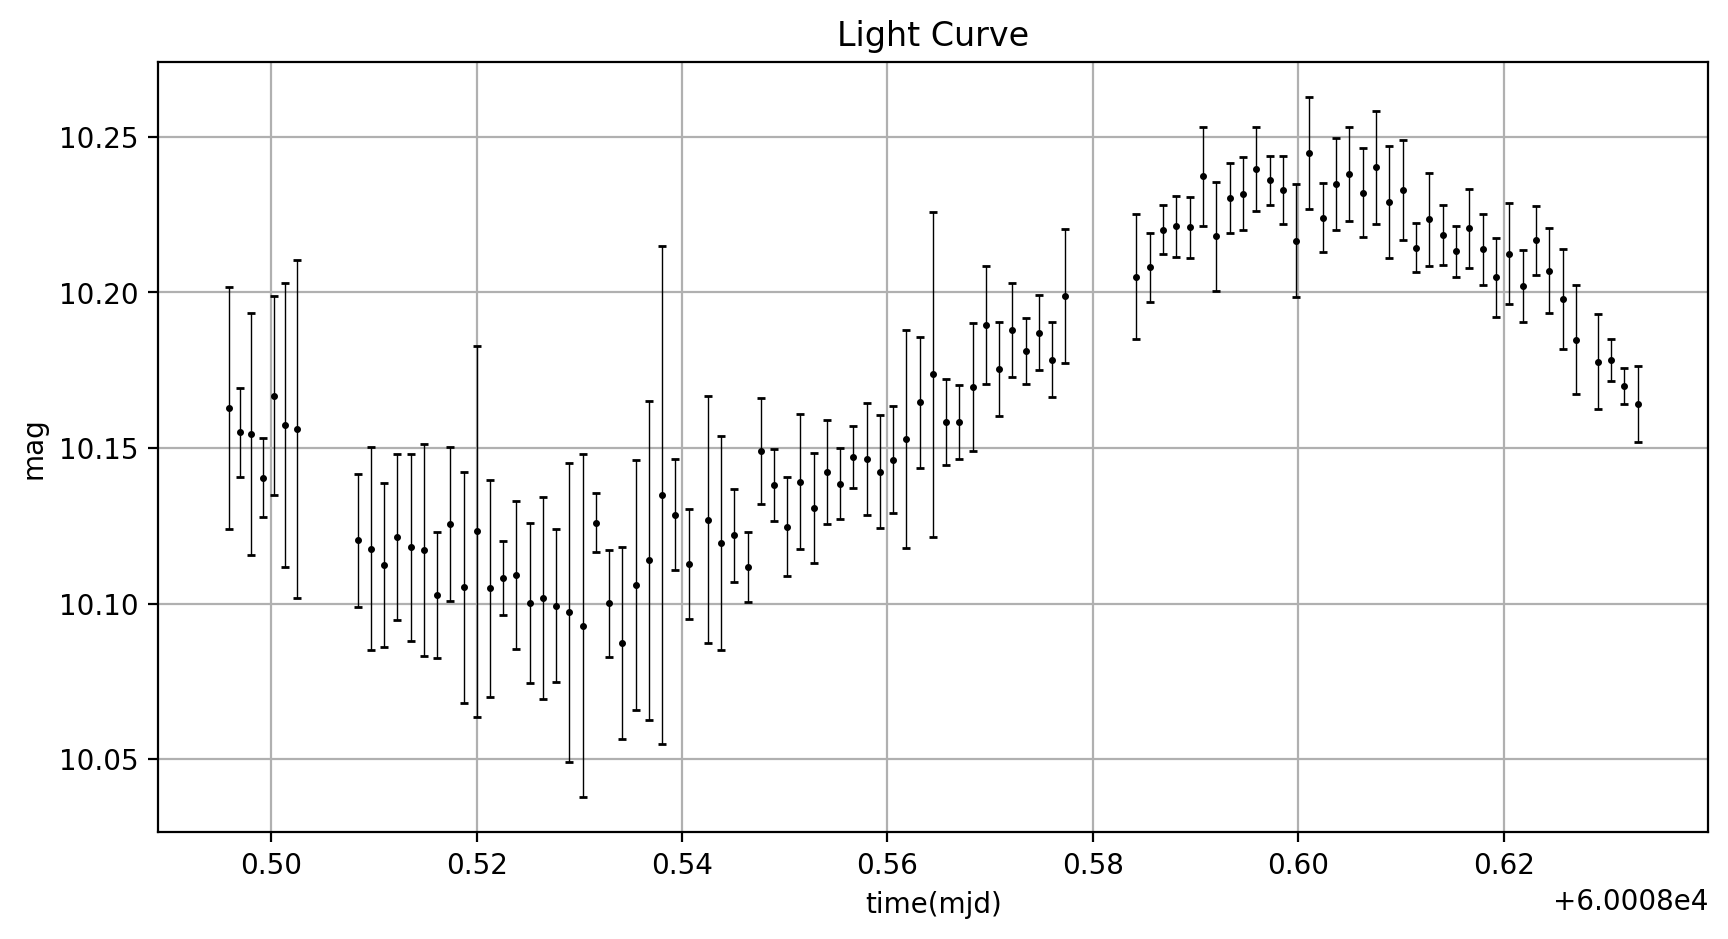

In [11]:
#绘制光变曲线
plt.figure(figsize=[10,5],dpi=200)
plt.title('Light Curve')
plt.errorbar(Data.T,Data.Mag,Data.Err,fmt='k.',markersize=3,linewidth=0.5,capsize=1.5)
plt.grid()
plt.xlabel('time(mjd)')
plt.ylabel('mag')